In [1]:
import diplib as dip
import numpy as np
import matplotlib.pyplot as plt
import os

PyDIPjavaio unavailable:
DLL load failed while importing PyDIPjavaio: The specified module could not be found.

libjvm not found
DIPlib -- a quantitative image analysis library
Version 3.2.0 (Feb  8 2022)
For more information see https://diplib.org


In [2]:
def load_dip_images(images_dir):
    """ Will only load the tif images of directory.
        Input:
            - images_dir: string containing the path
                of the directory of the image series
        Returns:
            - dip_images: list of loaded dip images
            - img_names: list of filenames
    """
    # check that directory is defined correctly
    if images_dir[-1] != "/":
        images_dir += "/"
    # load all .tif images
    dip_images = []
    img_names = []
    for filename in sorted(os.listdir(images_dir)):
        if ".tif" in filename:
            dip_images.append(dip.ImageReadTIFF(images_dir+filename))
            img_names.append(filename)
    return dip_images, img_names

In [3]:
def save_images(dip_images, images_dir, name_temp="", file_type="tif"):
    """ Saves the imput images
        Input:
            - dip_images: python list with the images to save
            - images_dir: string with the directory to save the images
            - name_temp: string containing the name structure 
                        to give to the series of images
            - file_type: can be string or list of file types to save image
    """
    # check that path is correctly defined
    if images_dir[-1] != "/":
        images_dir += "/"
    # create directories if needed
    if not os.path.exists(images_dir):
        os.makedirs(images_dir)
    # check name
    if name_temp != "" and name_temp[-1] != "-":
        name_temp += "-"
    # save images loop
    counter = 0
    for img in dip_images:
        if  "tif" in file_type:
            dip.ImageWriteTIFF(img,images_dir+name_temp+str(counter))
        if "jpeg" in file_type:
            # if the image is binary we need to multiply by 255
            if img.DataType() == "BIN":
                img = img * 255
            # save jpg image
            dip.ImageWriteJPEG(img,images_dir+name_temp+str(counter), 100)
            exit()
        counter += 1

In [4]:
dip_images, img_names = load_dip_images('data')

In [5]:
def make_grayscale(dip_images: list):
    """ Converts the diplip images to grayscale
    """
    grays = []
    for img in dip_images:
        new_img = dip.ColorSpaceManager.Convert(img, "gray")
        grays.append(new_img)
    return grays

In [6]:
dip_gray = make_grayscale(dip_images)

In [7]:
save_images(dip_gray, 'gray', "gray", file_type=["tif"])

In [50]:
def threshold_images(dip_images):
    """ Triangle threshold all the dip_images in the list.
        The images will be converted to grayscale if 
        not already grayscale.

        Input:
            dip_images: list of grayscale diplib images to threshold
            save: string of dir to save output images.
                Images only saved if dir is specified.
        Return:
            list of the thresholded images
    """
    images_thresh = []
    for img in dip_images:
        # curr_img = dip.ContrastStretch(img)
        curr_img = dip.Gauss(img, sigmas=[4])
        curr_img = dip.TriangleThreshold(curr_img)
        images_thresh.append(curr_img)
    return images_thresh

In [51]:
dip_thresh = threshold_images(dip_gray)

In [52]:
save_images(dip_thresh, 'thresh', "thresh", file_type=["tif"])

In [53]:
def apply_transformations(dip_images: list):
    """ Applies the defined transform to the dip_images
        Input:
            - dip_images: python list of diplib images
        Return:
            - out_images: python list with the transformed diplib images 
    """
    out_images = dip_images.copy()
    for i in range(len(out_images)):
        # fill holes
        out_images[i] = dip.FillHoles(out_images[i])
        # opening to remove white pixel noise
        out_images[i] = dip.Opening(out_images[i])
        # closing to fill dark holes:
        out_images[i] = dip.Closing(out_images[i])
        # erosion to remove boundary pixels
        out_images[i] = dip.Erosion(out_images[i])
        # dilation to extend object boundary to background
        out_images[i] = dip.Dilation(out_images[i])
        out_images[i] = dip.FillHoles(out_images[i])
       
    return out_images

In [54]:
dip_transf = apply_transformations(dip_thresh)

In [55]:
save_images(dip_transf, 'transf', "transf", file_type=["tif"])

In [20]:
a = dip.ImageReadTIFF('data/w8t1t2_d7_21.tif')
b = dip.ImageReadTIFF('data/w8t1t2_d7_21b.tif')

In [21]:
gray_a = dip.ColorSpaceManager.Convert(a, "gray")
gray_b = dip.ColorSpaceManager.Convert(b, "gray")
th = dip.TriangleThreshold(gray_a)
th1 = dip.TriangleThreshold(gray_b)

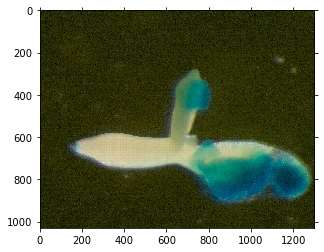

In [22]:
tot = a + b
tot.Show()


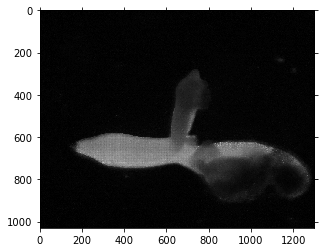

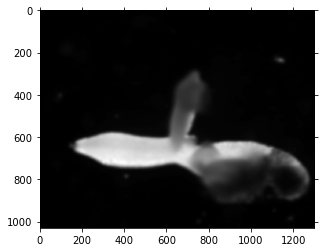

In [93]:
grey_tot = dip.ColorSpaceManager.Convert(tot, "gray")
grey_tot.Show()

structure = dip.StructuringElement("rectangular")

# filter = dip.Tophat(filter,structure)
filter = dip.Gauss(gray_a, sigmas=[6])
filter = dip.ContrastStretch(filter)
# filter = grey_tot + filter
# filter = dip.SobelGradient(gray_a)
filter.Show()

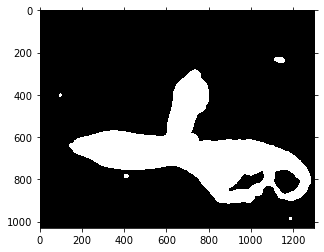

In [92]:
e = dip.TriangleThreshold(filter)
e.Show()

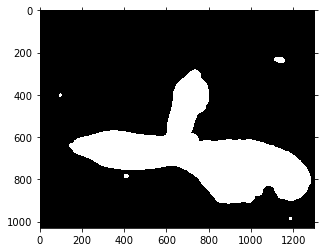

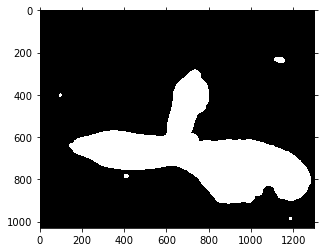

In [71]:
e=dip.FillHoles(e)
e.Show()
e=dip.Opening(e)
e=dip.Closing(e)
e=dip.Erosion(e)
e=dip.Dilation(e)



e.Show()